In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import G,m_p, M_sun

# Composition and Entropy

In [19]:
#Read Composition files from Rüdiger
#df=pd.read_csv("input_data/donor_composition.csv")
df=pd.read_csv("input_data/remnant_composition.csv")
print(df.columns)

Index(['r_inner,', 'r_outer,', 'mass,', 'density,', 'l_z,', 'v_r,', 'u,', 'p,',
       'T,', 'xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59'],
      dtype='object')


In [20]:
nickel_cut=2.0
he_cut="normal"    ## No helium cut
#he_cut="no"
#he_cut="tail"      ## Only 1% mass coordinate has it
#he_cut="replaced"  ## Replaced with C12


In [21]:
###Add He and O18 but make them 0 along with hydrogen
import astropy.units as u
df['xn_he3,'] = 0.0e0
df['xn_o18,'] = 0.0e0
df['xn_prot,'] = 0.0e0
df['xn_fe56,'] = 0.0e0
df['xn_co56,'] = 0.0e0
df['xn_cr56,'] = 0.0e0
df['xn_co56,'] = 0.0e0

df["embedded_mass"]=df["mass,"].cumsum()
he_mass=(df["mass,"]*df["xn_al26,"]).sum()*u.g/u.M_sun
print(he_mass.cgs)

2.1946722108859824e-07


In [22]:
print(df.columns)

Index(['r_inner,', 'r_outer,', 'mass,', 'density,', 'l_z,', 'v_r,', 'u,', 'p,',
       'T,', 'xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59', 'xn_he3,', 'xn_o18,', 'xn_prot,', 'xn_fe56,', 'xn_co56,',
       'xn_cr56,', 'embedded_mass'],
      dtype='object')


In [23]:
'''
columns_to_keep = ['mass,','embedded_mass','r_outer,', 'xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59','xn_he3,', 'xn_o18,', 'xn_prot,', 'xn_fe56,', 'xn_co56,',
       'xn_cr56,','density,','T,']
'''
'''
columns_to_keep = ['mass,','embedded_mass','r_outer,', 'xn_p,','xn_he3,', 'xn_he4,','xn_c12,','xn_n14,','xn_o16,','xn_o18,','xn_ne20,','xn_ne22,','xn_mg24,','xn_al26,',
                   'xn_si28,','xn_fe56,','xn_co56,','xn_ni56,','density,','T,']
'''
columns_to_keep=['mass,','embedded_mass','r_outer,','xn_n,', 'xn_p,','xn_prot,',
        'xn_he3,', 'xn_he4,', 'xn_c12,', 'xn_n14,', 'xn_o16,',
        'xn_ne20,', 'xn_mg24,', 'xn_si28,', 'xn_s32,', 'xn_ar36,',
       'xn_ca40,', 'xn_ti44,', 'xn_cr48,', 'xn_cr56,', 'xn_fe52,', 'xn_fe54,',
       'xn_fe56,', 'xn_co56,', 'xn_ni56,','density,','T,']

df=df[columns_to_keep]
print(len(df.columns))
df["mass_coord"]=df["embedded_mass"]/M_sun.cgs.value
df["embedded_mass"]=(df["embedded_mass"]/df["mass,"].sum())
df["q_m"]=1.0e00-df["embedded_mass"]
df.loc[df['q_m'] < 0, 'q_m'] = 0 #Due to numerics

print(df)

27
            mass,  embedded_mass      r_outer,         xn_n,         xn_p,  \
0    1.312658e+30          0.001  4.916621e+07  1.000000e-30  1.000000e-30   
1    1.312686e+30          0.002  6.194260e+07  1.000000e-30  1.000000e-30   
2    1.312821e+30          0.003  7.101204e+07  1.000000e-30  1.000000e-30   
3    1.312681e+30          0.004  7.829346e+07  1.000000e-30  1.000000e-30   
4    1.312702e+30          0.005  8.443594e+07  1.000000e-30  1.000000e-30   
..            ...            ...           ...           ...           ...   
995  1.312750e+30          0.996  1.273202e+10  5.482333e-19  5.456557e-04   
996  1.312809e+30          0.997  1.320250e+10  5.219094e-19  5.450512e-04   
997  1.312757e+30          0.998  1.369599e+10  4.913822e-19  5.446626e-04   
998  1.312708e+30          0.999  1.419352e+10  5.066182e-19  5.385028e-04   
999  1.312887e+30          1.000  1.468800e+10  4.707316e-19  5.354634e-04   

     xn_prot,  xn_he3,       xn_he4,   xn_c12,       xn_n14,

In [24]:
if he_cut=="replaced":
    df["xn_c12,"]=df["xn_c12,"]+df["xn_he4,"]
    df["xn_he4,"]=0*df["xn_he4,"]
elif he_cut=="no":
    df["xn_he4,"]=0*df["xn_he4,"]   

df2=df.columns[3:(len(columns_to_keep)-2)]
print(df2)
df[df2]= df[df2].div(df[df2].sum(axis=1), axis=0) #Since originally we had more elements we need to renomarlize


Index(['xn_n,', 'xn_p,', 'xn_prot,', 'xn_he3,', 'xn_he4,', 'xn_c12,',
       'xn_n14,', 'xn_o16,', 'xn_ne20,', 'xn_mg24,', 'xn_si28,', 'xn_s32,',
       'xn_ar36,', 'xn_ca40,', 'xn_ti44,', 'xn_cr48,', 'xn_cr56,', 'xn_fe52,',
       'xn_fe54,', 'xn_fe56,', 'xn_co56,', 'xn_ni56,'],
      dtype='object')


In [25]:
gravity=df["mass,"].cumsum()/df["r_outer,"]
print(gravity)
gravity=G.cgs.value*gravity
nickel=5.38*df["xn_ni56,"]*(1.6e-6)/(56*m_p.cgs.value) #5.38 MeV from Ni56 to Iron
print(nickel)
print(gravity)



0      2.669837e+22
1      4.238349e+22
2      5.545770e+22
3      6.706621e+22
4      7.773405e+22
           ...     
995    1.026921e+23
996    9.913206e+22
997    9.565601e+22
998    9.239549e+22
999    8.937433e+22
Length: 1000, dtype: float64
0      5.146411e-12
1      5.146411e-12
2      5.146411e-12
3      5.146411e-12
4      5.146411e-12
           ...     
995    7.167753e+16
996    7.169036e+16
997    7.171433e+16
998    7.120423e+16
999    7.096731e+16
Name: xn_ni56,, Length: 1000, dtype: float64
0      1.781929e+15
1      2.828801e+15
2      3.701413e+15
3      4.476200e+15
4      5.188203e+15
           ...     
995    6.853981e+15
996    6.616371e+15
997    6.384369e+15
998    6.166752e+15
999    5.965111e+15
Length: 1000, dtype: float64


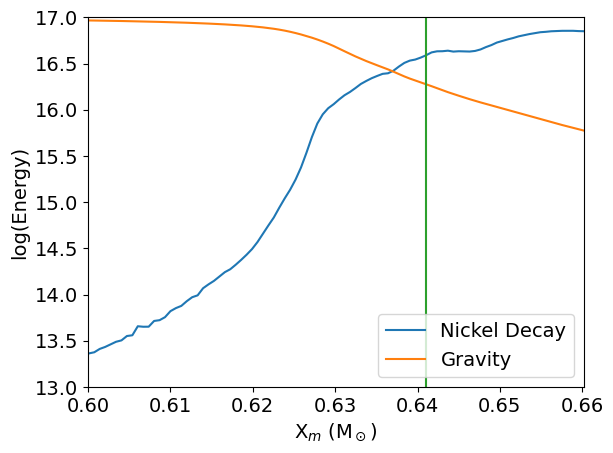

In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.plot(df["mass_coord"],np.log10((nickel)))
plt.plot(df["mass_coord"],np.log10(gravity))
plt.xlabel("X$_m$ (M$_\odot$)")
plt.ylabel("log(Energy)")
plt.legend(["Nickel Decay","Gravity"])
plt.xlim(0.6,np.max(df["mass_coord"]))
plt.ylim(13,17)

plt.plot((df["mass_coord"][(nickel/gravity)>nickel_cut].iloc[0],
          df["mass_coord"][(nickel/gravity)>nickel_cut].iloc[0]),(13,17))


In [32]:
index=np.where(df["mass_coord"]>0.64)
print(index)

(array([969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981,
       982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994,
       995, 996, 997, 998, 999]),)


In [27]:
diff=np.abs((-nickel/gravity)+nickel_cut).argmin()
#print(diff)
df = df.drop(df.index[diff:])
if he_cut=="tail":
    df["xn_c12,"][df["mass_coord"]<0.99*np.max(df["mass_coord"])]=df["xn_c12,"][df["mass_coord"]<0.99*np.max(df["mass_coord"])]+df["xn_he4,"][df["mass_coord"]<0.99*np.max(df["mass_coord"])]
    df["xn_he4,"][df["mass_coord"]<0.99*np.max(df["mass_coord"])]=0
    df[df2]= df[df2].div(df[df2].sum(axis=1), axis=0) #Since originally we had more elements we need to renomarlize
print(df)



            mass,  embedded_mass      r_outer,         xn_n,         xn_p,  \
0    1.312658e+30          0.001  4.916621e+07  1.000000e-30  1.000000e-30   
1    1.312686e+30          0.002  6.194260e+07  1.000000e-30  1.000000e-30   
2    1.312821e+30          0.003  7.101204e+07  1.000000e-30  1.000000e-30   
3    1.312681e+30          0.004  7.829346e+07  1.000000e-30  1.000000e-30   
4    1.312702e+30          0.005  8.443594e+07  1.000000e-30  1.000000e-30   
..            ...            ...           ...           ...           ...   
965  1.312778e+30          0.966  3.471213e+09  9.656600e-19  2.109321e-04   
966  1.312738e+30          0.967  3.684076e+09  1.006453e-18  2.331142e-04   
967  1.312661e+30          0.968  3.889459e+09  1.041513e-18  2.476777e-04   
968  1.312830e+30          0.969  4.086974e+09  1.069989e-18  2.549104e-04   
969  1.312666e+30          0.970  4.285521e+09  1.079885e-18  2.687457e-04   

     xn_prot,  xn_he3,       xn_he4,   xn_c12,       xn_n14,  .

In [28]:
df["q_m"]=1-(df["mass,"].cumsum()/df["mass,"].sum())
df.loc[df['q_m'] < 0, 'q_m'] = 0 #Due to numerics

print(df)

            mass,  embedded_mass      r_outer,         xn_n,         xn_p,  \
0    1.312658e+30          0.001  4.916621e+07  1.000000e-30  1.000000e-30   
1    1.312686e+30          0.002  6.194260e+07  1.000000e-30  1.000000e-30   
2    1.312821e+30          0.003  7.101204e+07  1.000000e-30  1.000000e-30   
3    1.312681e+30          0.004  7.829346e+07  1.000000e-30  1.000000e-30   
4    1.312702e+30          0.005  8.443594e+07  1.000000e-30  1.000000e-30   
..            ...            ...           ...           ...           ...   
965  1.312778e+30          0.966  3.471213e+09  9.656600e-19  2.109321e-04   
966  1.312738e+30          0.967  3.684076e+09  1.006453e-18  2.331142e-04   
967  1.312661e+30          0.968  3.889459e+09  1.041513e-18  2.476777e-04   
968  1.312830e+30          0.969  4.086974e+09  1.069989e-18  2.549104e-04   
969  1.312666e+30          0.970  4.285521e+09  1.079885e-18  2.687457e-04   

     xn_prot,  xn_he3,       xn_he4,   xn_c12,       xn_n14,  .

In [29]:
df.insert(0,"q_m",df.pop("q_m"))
df=df.loc[::-1].reset_index(drop=True) #Same for Entropy
print(df)

          q_m         mass,  embedded_mass      r_outer,         xn_n,  \
0    0.000000  1.312666e+30          0.970  4.285521e+09  1.079885e-18   
1    0.001031  1.312830e+30          0.969  4.086974e+09  1.069989e-18   
2    0.002062  1.312661e+30          0.968  3.889459e+09  1.041513e-18   
3    0.003093  1.312738e+30          0.967  3.684076e+09  1.006453e-18   
4    0.004124  1.312778e+30          0.966  3.471213e+09  9.656600e-19   
..        ...           ...            ...           ...           ...   
965  0.994845  1.312702e+30          0.005  8.443594e+07  1.000000e-30   
966  0.995876  1.312681e+30          0.004  7.829346e+07  1.000000e-30   
967  0.996907  1.312821e+30          0.003  7.101204e+07  1.000000e-30   
968  0.997938  1.312686e+30          0.002  6.194260e+07  1.000000e-30   
969  0.998969  1.312658e+30          0.001  4.916621e+07  1.000000e-30   

            xn_p,  xn_prot,  xn_he3,       xn_he4,   xn_c12,  ...  \
0    2.687457e-04       0.0      0.0  1.06

(0.6, 0.6403848485488453)

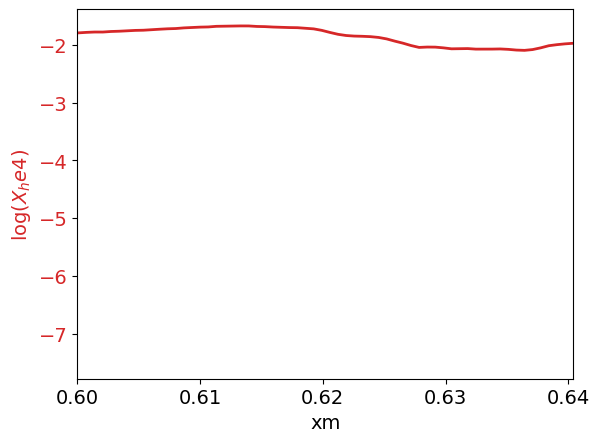

In [30]:
color = 'tab:red'
fig, ax1 = plt.subplots()
plt.rcParams["lines.linewidth"]=2
plt.rcParams["font.size"]=16
ax1.set_xlabel('xm')
ax1.set_ylabel(r'log($X_he4$)', color=color)
ax1.plot(df["mass_coord"], np.log10(df["xn_he4,"]), color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xlim(0.6,np.max(df["mass_coord"]))

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#ax2.set_ylabel('log(T)', color=color)  # we already handled the x-label with ax1
#ax2.plot(np.log10(df["r_outer,"]*10e-5), np.log10(df["T,"]), color=color)
#ax2.tick_params(axis='y', labelcolor=color)

In [36]:
total_mass=(df["mass,"]).sum()/(u.M_sun)
print(total_mass)

1.2733475539e+33 1 / solMass


In [37]:


df_comp=df[['q_m','xn_n,', 'xn_p,','xn_prot,',
        'xn_he3,', 'xn_he4,', 'xn_c12,', 'xn_n14,', 'xn_o16,',
        'xn_ne20,', 'xn_mg24,', 'xn_si28,', 'xn_s32,', 'xn_ar36,',
       'xn_ca40,', 'xn_ti44,', 'xn_cr48,', 'xn_cr56,', 'xn_fe52,', 'xn_fe54,',
       'xn_fe56,', 'xn_co56,', 'xn_ni56,']]
'''
#For making EOS/entropy files:
df_comp=df[['q_m', 'xn_p,','xn_he3,', 'xn_he4,',
       'xn_b11,', 'xn_c12,', 'xn_c13,', 'xn_n13,', 'xn_n14,', 'xn_n15,',
       'xn_o15,', 'xn_o16,', 'xn_o17,', 'xn_f18,', 'xn_ne19,', 'xn_ne20,',
       'xn_ne21,', 'xn_ne22,', 'xn_na22,', 'xn_na23,', 'xn_mg23,', 'xn_mg24,',
       'xn_mg25,', 'xn_mg26,', 'xn_al25,', 'xn_al26,', 'xn_al27,', 'xn_si28,',
       'xn_si29,', 'xn_si30,', 'xn_p29,', 'xn_p30,', 'xn_p31,', 'xn_s31,',
       'xn_s32,', 'xn_s33,', 'xn_cl33,', 'xn_cl34,', 'xn_cl35,', 'xn_ar36,',
       'xn_ar37,', 'xn_ar38,', 'xn_ar39,', 'xn_k39,', 'xn_ca40,', 'xn_sc43,',
       'xn_ti44,', 'xn_v47,', 'xn_cr48,', 'xn_mn51,', 'xn_fe52,', 'xn_fe54,',
       'xn_co55,','xn_fe56,', 'xn_co56,', 'xn_cr56,', 'xn_ni56,', 'xn_ni58,', 'xn_ni59']]
df_comp.to_csv(f'output_data/Entropy_Injection/eos_donor_composition_{he_cut}helium_nocutNi56.dat', sep='\t', index=False)
df_ent=df[['q_m','density,','T,']]
df_ent.to_csv(f'output_data/Entropy_Injection/eos_donor_entropy_{he_cut}helium_nocutNi56.dat', sep='\t', index=False)
'''
print(df_comp)


          q_m         xn_n,         xn_p,  xn_prot,  xn_he3,       xn_he4,  \
0    0.000000  1.079885e-18  2.687457e-04       0.0      0.0  1.062785e-02   
1    0.001031  1.069989e-18  2.549104e-04       0.0      0.0  1.038690e-02   
2    0.002062  1.041513e-18  2.476777e-04       0.0      0.0  1.005796e-02   
3    0.003093  1.006453e-18  2.331142e-04       0.0      0.0  9.645405e-03   
4    0.004124  9.656600e-19  2.109321e-04       0.0      0.0  8.859319e-03   
..        ...           ...           ...       ...      ...           ...   
965  0.994845  1.000000e-30  1.000000e-30       0.0      0.0  1.636196e-07   
966  0.995876  1.000000e-30  1.000000e-30       0.0      0.0  1.174176e-07   
967  0.996907  1.000000e-30  1.000000e-30       0.0      0.0  8.055901e-08   
968  0.997938  1.000000e-30  1.000000e-30       0.0      0.0  6.945016e-08   
969  0.998969  1.000000e-30  1.000000e-30       0.0      0.0  7.326613e-08   

      xn_c12,       xn_n14,   xn_o16,      xn_ne20,  ...      x

In [14]:
print(len(df_comp.columns))

59


In [38]:
file_path=f"output_data_paper/remnant_composition_approx21plusco56_{he_cut}helium_2.0timesNi56.dat"
print(file_path)

output_data_paper/remnant_composition_approx21plusco56_normalhelium_2.0timesNi56.dat


In [39]:
with open(file_path,'w') as file:
    file.write(f'{len(df_comp)} {len(df_comp.columns)-1}\n')
    df_comp.to_csv(file, sep='\t', header=False, index=False)


In [84]:
file_path=f"output_data_paper/donor_entropy_approx21plusco56_{he_cut}helium.dat"
df_ent=df[['q_m','density,','T,']]
with open(file_path,'w') as file:
    file.write(f'{len(df_comp)}\n')
    df_ent.to_csv(file, sep='\t', header=False, index=False)

# Plotting

In [22]:
columns_to_plot = [ 'xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59'
       
       ]


In [28]:
print(df.columns)
print(len(columns_to_plot))

Index(['r_inner,', 'r_outer,', 'mass,', 'density,', 'l_z,', 'v_r,', 'u,', 'p,',
       'T,', 'xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59', 'xn_he3,', 'xn_o18,', 'xn_prot,', 'xn_fe56,', 'xn_co56,',
       'xn_cr56,', 'embedded_mass'],
      dtype='object')
55


xn_p, 1.0418595609273283e-05
xn_he4, 0.0029667410392070757
xn_c12, 0.31963812459609814
xn_n13, 1.650217901004133e-06
xn_o16, 0.3176535846010781
xn_ne20, 0.0030118815627191466
xn_na23, 1.3405967009245078e-07
xn_mg23, 1.0462086742314353e-07
xn_mg24, 0.0006866523132722248
xn_mg25, 3.010813427691945e-07
xn_al25, 6.136566574160555e-07
xn_al26, 2.1946722108859824e-07
xn_al27, 8.406184682670743e-07
xn_si28, 0.0003809645524553786
xn_si29, 7.382604693183605e-07
xn_si30, 6.437504231666393e-08
xn_p29, 1.5120815805029745e-06
xn_p30, 1.7387765191397573e-07
xn_p31, 2.524352130564257e-07
xn_s31, 1.5911905625419938e-07
xn_s32, 0.00018293695758971827
xn_s33, 5.071980356199089e-07
xn_cl33, 1.064853505882485e-06
xn_cl34, 2.4358075921104844e-07
xn_ar36, 4.281144264242217e-05
xn_ar37, 2.826466983781324e-08
xn_ca40, 4.7418650193434235e-05
xn_ti44, 4.3533070536629785e-07
xn_cr48, 1.960138382136027e-06
xn_fe52, 2.699142791151548e-05
xn_fe54, 8.135227594737468e-08
xn_ni56, 0.01520799007176951
xn_ni58, 0.000305

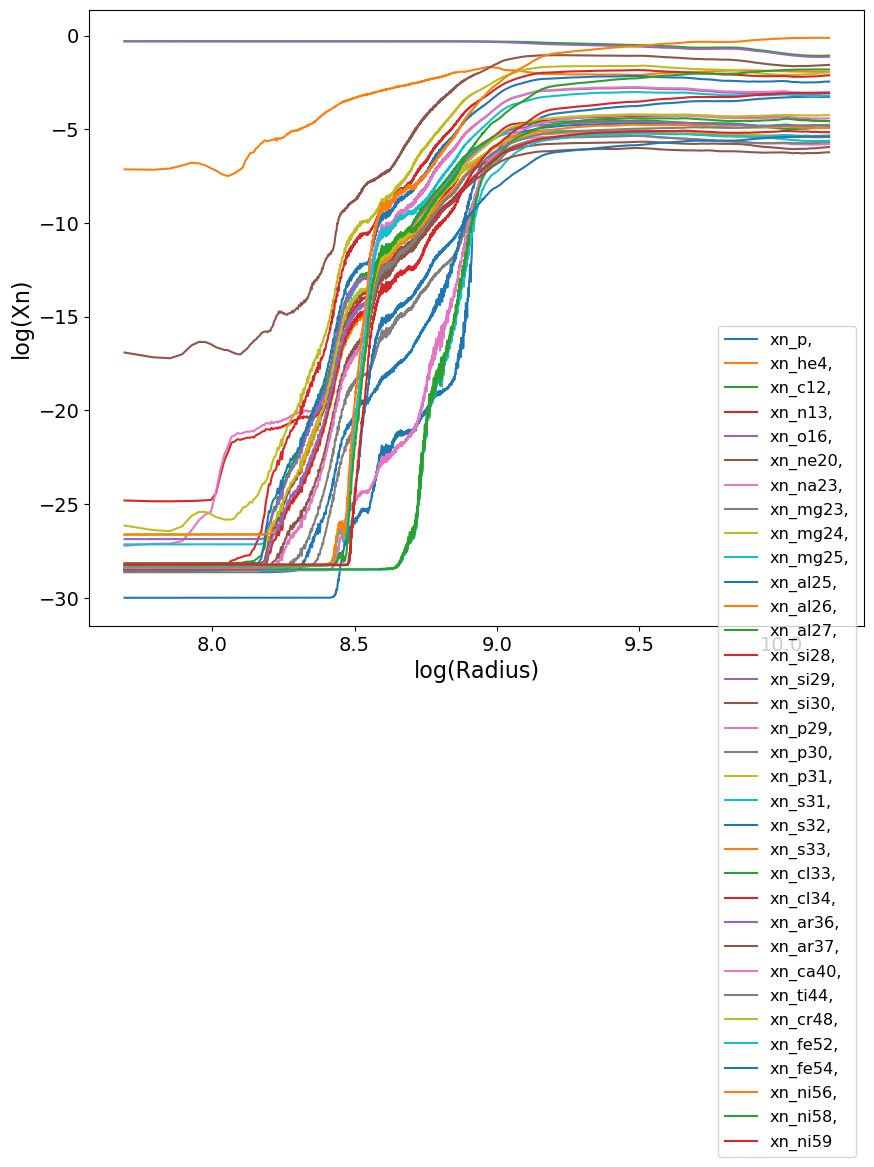

In [26]:
import matplotlib.pyplot as plt
import numpy as np
num_columns = len(df[columns_to_plot].columns[:-1])  # Exclude the X-axis column
#print(num_columns)
plt.figure(figsize=(10, 8))
for i, column in enumerate(df[columns_to_plot].columns[:]):
    if max(df[column])>1.0e-6:
        plt.plot(np.log10(df["r_outer,"]), np.log10(df[column]), label=column)
        x_mass=(df["mass,"]*df[column]).sum()*u.g/u.M_sun
        print(column,x_mass.cgs)
    
plt.xlabel("log(Radius)",fontsize=16)
plt.ylabel("log(Xn)",fontsize=16)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5),fontsize='small')
#plt.ylim(-8,0)

In [7]:
def luminosity(mass,totalmass,energyofdecaymev,decaytime):
    energy=energyofdecaymev*totalmass*6.0e23/(2*mass)
    lum=energy/(decaytime)
    lumsun=lum*(1.6e-13)/(3.826e26)

    return lumsun

In [38]:
print(df['xn_ni59,'])

KeyError: 'xn_ni59,'

In [14]:
massofni59=((df["mass,"]*df['xn_ar39,']).sum())
print(luminosity(39,massofni59,0.5,8.4e+9))

6.724200790978733e-09


In [6]:
print(massofni59)

3.4492232736281215e+28
